<div class="alert alert-block alert-info">
<h1>CinéSuccess Predictor : </h1> <p> Projet réalisé par : Rouaa Blel et Zakarya AD    </p></div>



<blockquote> <h2 style="color:LightSlateGray" > 1.  L'installation de Chromium  </h2>   </blockquote>
<a class="anchor" id="chapter1"></a
Tourner cette partie si Chromium n'est pas déjà installé sur ton SSPCloud </a>


In [36]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
!sudo apt-get update
!sudo -E apt-get install -y /tmp/chrome.deb
!pip install chromedriver-autoinstaller selenium

--2023-12-10 14:40:53--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 142.250.179.78, 2a00:1450:4007:80e::200e
Connecting to dl.google.com (dl.google.com)|142.250.179.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104956912 (100M) [application/x-debian-package]
Saving to: ‘/tmp/chrome.deb’

/tmp/chrome.deb     100%[===================>] 100.09M  24.7MB/s    in 4.2s    

2023-12-10 14:40:58 (23.7 MB/s) - ‘/tmp/chrome.deb’ saved [104956912/104956912]



<blockquote> <h2 style="color:LightSlateGray" > 2.  La partie Scrapping  </h2>   </blockquote>
L'objectif c'est d'extraire des données à partir du site web <a href='https://www.rottentomatoes.com/browse/movies_at_home' title="BASE"> ROTTEN TOMATOES </a>


In [4]:
import chromedriver_autoinstaller
path_to_web_driver=chromedriver_autoinstaller.install()

<code style="background:LightBlue;color:black"> <strong><em> Remarque : </em> </strong>   

La bibliothèque <strong><em> chromedriver_autoinstaller  </em> </strong>    est utilisée pour simplifier le processus d'installation du pilote ChromeDriver lors de l'utilisation de Selenium avec Chrome. Elle détecte automatiquement la version de Google Chrome installée sur votre ordinateur, télécharge ensuite la version correspondante du pilote ChromeDriver, et l'installe automatiquement.

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
#chrome_options.add_argument('--verbose') 

In [6]:
from selenium.webdriver.chrome.service import Service
service = Service(executable_path=path_to_web_driver)
browser = webdriver.Chrome(service=service,
                           options=chrome_options)

In [7]:
browser.get('https://www.rottentomatoes.com/browse/movies_at_home')

<code style="background:LightBlue;color:black"> <strong><em> Remarque : </em> </strong>   

Pour vérifier que on est sur la bonne on peut faire un capture d'écran sur le navigateur ouvert par Selenium 

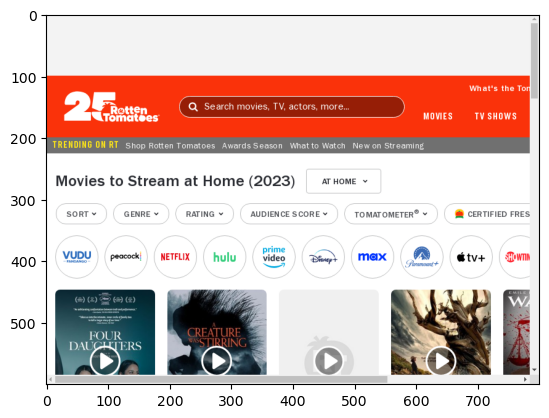

In [8]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

screenshot = browser.get_screenshot_as_png()
# Use BytesIO to create a file-like object from bytes
image_buffer = BytesIO(screenshot)

# Open the image using PIL
image = Image.open(image_buffer)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('on')  # Optional: Turn off axes if you don't want them
plt.show()

In [11]:
from selenium.webdriver.common.by import By
#Charger le plus de page possible en cliquant sur le boutton Load_more
from selenium.common.exceptions import NoSuchElementException  
for i in range(0,50):
   try:
    # Attempt to find and click the button
      search_button = browser.find_element(By.CSS_SELECTOR,'#main-page-content > div.discovery > div.discovery__actions > button')
      search_button.click()
      print("Button clicked successfully.")

   except NoSuchElementException:
      print("No more button found. Exiting the loop.")
      break  # Exit the loop if no more button is found

   


Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked successfully.
Button clicked

In [12]:
links=[]
lnks=browser.find_elements(By.CSS_SELECTOR, "#main-page-content > div.discovery > div > div > div > div > div > tile-dynamic > a")
for lnk in lnks:
        # get_attribute() to get all href
        print(lnk.get_attribute("href"))
        links.append(lnk.get_attribute("href"))

https://www.rottentomatoes.com/m/four_daughters_2023
https://www.rottentomatoes.com/m/a_creature_was_stirring
https://www.rottentomatoes.com/m/kevin_hart_and_chris_rock_headliners_only
https://www.rottentomatoes.com/m/trees_and_other_entanglements
https://www.rottentomatoes.com/m/walden_2023
https://www.rottentomatoes.com/m/i_can
https://www.rottentomatoes.com/m/chick_flick
https://www.rottentomatoes.com/m/taylor_swift_the_eras_tour
https://www.rottentomatoes.com/m/chicken_run_dawn_of_the_nugget
https://www.rottentomatoes.com/m/priscilla
https://www.rottentomatoes.com/m/the_family_plan
https://www.rottentomatoes.com/m/our_son
https://www.rottentomatoes.com/m/finestkind
https://www.rottentomatoes.com/m/angel_baby_2023
https://www.rottentomatoes.com/m/immediate_family_2022
https://www.rottentomatoes.com/m/leave_the_world_behind_2023
https://www.rottentomatoes.com/m/killers_of_the_flower_moon
https://www.rottentomatoes.com/m/lady_ballers
https://www.rottentomatoes.com/m/may_december
https

In [17]:
import time
movies_info=[]
for link in links:
    
    try:
        browser.get(link)      # Open the ad link
        time.sleep(5)
    except:
        browser.refresh()
        browser.get(link)      # Open the ad link
        time.sleep(5)
    film_info = {}    
    # Get the title and  SCORE

    SCORE= browser.find_elements(By.CSS_SELECTOR, "#scoreboard")[0].text
    SCORE=SCORE.split("\n")
    tomatometer_index = SCORE.index('TOMATOMETER')
    audience_score_index = SCORE.index('AUDIENCE SCORE')
    
    film_info["Title"] = [SCORE[0]]   
    film_info["AUDIENCE_SCORE"] = [SCORE[audience_score_index-1]]
    film_info["CRITCS_SCORE"] = [SCORE[tomatometer_index-1]]    

    
    # Get the info
    info=browser.find_elements(By.CSS_SELECTOR,"#info")[0].text
    info=info.split("\n")
    
    
    
    # Créer un dictionnaire à partir des informations extraites
    
    for item in info:
        try:
          key, value = item.split(": ", 1)
          film_info[key] = [value]
        
        except:
            1



                  
    # Append the movie dictionary to the list
    movies_info.append(film_info)
        
    

In [18]:
import pandas 
df = pandas.DataFrame(movies_info)

# Replace missing values with None
df = df.where(pandas.notna(df), None)


In [19]:
df

,Title,AUDIENCE_SCORE,CRITCS_SCORE,Genre,Original Language,Director,Producer,Writer,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Distributor,Production Co,Sound Mix,Rating,Aspect Ratio,View the collection,Rerelease Date (Theaters)
0,[FOUR DAUGHTERS],[86%],[96%],"[Documentary, Drama]",[Arabic],[Kaouther Ben Hania],[Nadim Cheikhrouha],[Kaouther Ben Hania],"[Oct 27, 2023 Limited]","[Dec 12, 2023]",[$39.5K],[1h 47m],[Kino Lorber],"[Tanit Films, Twenty Twenty Vision Filmprodukt...",[Dolby Digital],None,None,None,None
1,[A CREATURE WAS STIRRING],[--],[50%],"[Holiday, Horror, Mystery & thriller]",[English],[Damien LeVeck],"[Aaron B. Koontz, Damien LeVeck, Natalie LeVec...",[Shannon Wells],"[Dec 8, 2023 Limited]","[Dec 12, 2023]",None,[1h 40m],[Well Go USA Entertainment],"[Skubalon, Paper Street Pictures]",None,[R (Some Sexual References|Bloody Images|Langu...,None,None,None
2,[KEVIN HART & CHRIS ROCK: HEADLINERS ONLY],[--],[--],"[Comedy, Documentary, Stand-up]",[English],[Rashidi Natara Harper],"[Kevin Hart, Bryan Smiley, Luke Kelly-Clyne, C...",None,None,"[Dec 12, 2023]",None,[1h 22m],[Netflix],None,None,None,None,None,None
3,[TREES AND OTHER ENTANGLEMENTS],[--],[--],[Documentary],[English],[Irene Taylor],"[Peter D. Richardson, Irene Taylor]",None,None,"[Dec 12, 2023]",None,[1h 50m],[Max],[Vermilion Films],None,None,None,None,None
4,[WALDEN],[88%],[--],"[Mystery & thriller, Horror]",[English],[Mick Davis],"[Sara Sometti Michaels, Seth Michaels]",[Mick Davis],"[Nov 10, 2023 Limited]","[Dec 12, 2023]",None,[1h 42m],[Uncork'd Entertainment],[Benacus Entertainment],None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,[WHAT HAPPENS LATER],[28%],[52%],"[Romance, Comedy]",[English],[Meg Ryan],"[Jonathan Duffy, Kelly Williams, Laura D. Smit...","[Steven Dietz, Kirk Lynn, Meg Ryan]","[Nov 3, 2023 Wide]","[Nov 28, 2023]",[$3.3M],[1h 43m],[Bleecker Street],"[Das Films, Prowess Pictures, Rockhill Studios...",None,[R (Brief Drug Use|Some Sexual References|Lang...,None,None,None
136,"[CONFESS, FLETCH]",[75%],[86%],"[Comedy, Mystery & thriller]",[English],[Greg Mottola],"[Bill Block, Jon Hamm, Connie Tavel]","[Greg Mottola, Zev Borow]","[Sep 16, 2022 Wide]","[Sep 16, 2022]",[$711.6M],[1h 38m],[Miramax Films],[Miramax],None,[R (Some Sexual Content|Language|Drug Use)],[Flat (1.85:1)],None,None
137,[THEY CLONED TYRONE],[100%],[95%],"[Sci-fi, Comedy]",[English],[Juel Taylor],"[Jamie Foxx, Charles D. King, Stephen ""Dr"" Lov...","[Tony Rettenmaier, Juel Taylor]","[Jul 14, 2023 Limited]","[Jul 21, 2023]",None,[2h 2m],[Netflix],"[Federal Films, Made With Love Media, MACRO]",[Dolby Digital],[R (Violence|Drug Use|Some Sexual Material|Per...,None,None,None
138,[OFFICE CHRISTMAS PARTY],[40%],[40%],"[Holiday, Comedy]",[English],"[Josh Gordon, Will Speck]","[Guymon Casady, Daniel Rappaport, Scott Stuber]","[Justin Malen, Laura Solon, Dan Mazer]","[Dec 9, 2016 Wide]","[Mar 21, 2017]",[$54.1M],[1h 45m],[Paramount Pictures],"[Bluegrass Films, Entertainment 360]",None,[R (Drug Use|Crude Sexual Content|Graphic Nudi...,[Scope (2.35:1)],None,None
